In [37]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Função objetivo fora da classe
def fitness_function(x):
    """
    f(x) = 2^(-2 * ((x - 0.1) / 0.9)^2) * sin(5*pi*x)^6
    """
    return 2**(-2 * ((x - 0.1) / 0.9)**2) * np.sin(5 * np.pi * x)**6

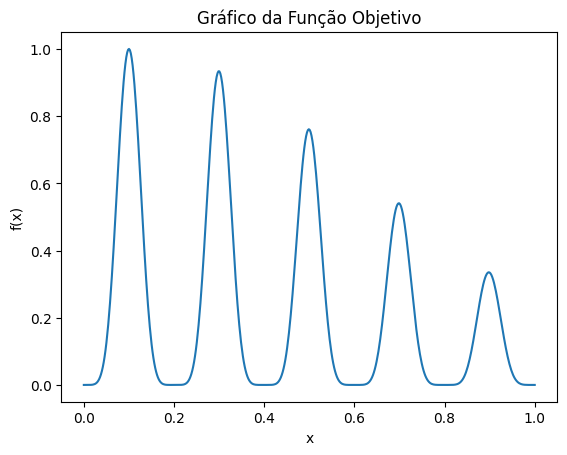

In [39]:
def plot_fitness_function():
    # Geração de pontos no intervalo [0,1]
    x = np.linspace(0, 1, 500)
    y = fitness_function(x)

    # Plot da função
    plt.figure()
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gráfico da Função Objetivo")
    plt.show()

plot_fitness_function()


In [40]:
class GeneticAlgorithm:
    def __init__(self,
                 fitness_fn,
                 population_size=50,
                 generations=100,
                 bits=10,
                 tournament_size=3,
                 crossover_rate=0.8,
                 mutation_rate=0.01,
                 x_lower=0.0,
                 x_upper=1.0):
        self.fitness_fn = fitness_fn
        self.population_size = population_size
        self.generations = generations
        self.bits = bits
        self.max_int = 2**bits - 1
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate
        # mutation_rate per bit
        self.mutation_rate = mutation_rate
        self.x_lower = x_lower
        self.x_upper = x_upper

    def initialize_population(self):
        # Inteiros que representam bitstrings
        return np.random.randint(0, self.max_int + 1, self.population_size)

    def decode(self, chromosome):
        # Map integer para [x_lower, x_upper]
        return self.x_lower + (self.x_upper - self.x_lower) * chromosome / self.max_int

    def fitnesses(self, population):
        xs = self.decode(population)
        return self.fitness_fn(xs)

    def tournament_selection(self, population, fitnesses):
        selected = []
        for _ in range(self.population_size):
            contenders = np.random.choice(self.population_size, self.tournament_size, replace=False)
            winner = contenders[np.argmax(fitnesses[contenders])]
            selected.append(population[winner])
        return np.array(selected)

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.bits)
            # Máscaras para trocas
            mask = (1 << point) - 1
            child1 = (parent1 & mask) | (parent2 & ~mask)
            child2 = (parent2 & mask) | (parent1 & ~mask)
            return child1, child2
        return parent1, parent2

    def mutate(self, chromosome):
        for bit in range(self.bits):
            if np.random.rand() < self.mutation_rate:
                chromosome ^= (1 << bit)
        return chromosome

    def run(self):
        population = self.initialize_population()
        best_history = []
        avg_history = []
        best_solution = None
        best_fitness = -np.inf

        for gen in range(self.generations):
            fitness_vals = self.fitnesses(population)
            best_gen = np.max(fitness_vals)
            avg_gen = np.mean(fitness_vals)
            best_history.append(best_gen)
            avg_history.append(avg_gen)

            # Atualiza melhor geral
            idx = np.argmax(fitness_vals)
            if fitness_vals[idx] > best_fitness:
                best_fitness = fitness_vals[idx]
                best_solution = population[idx]

            # Seleção e reprodução
            selected = self.tournament_selection(population, fitness_vals)
            np.random.shuffle(selected)
            next_pop = []
            for i in range(0, self.population_size, 2):
                p1 = selected[i]
                p2 = selected[i+1 if i+1 < self.population_size else 0]
                c1, c2 = self.crossover(p1, p2)
                next_pop.append(self.mutate(c1))
                next_pop.append(self.mutate(c2))
            population = np.array(next_pop)

        best_x = self.decode(best_solution)
        return best_x, best_fitness, best_history, avg_history

Melhor solução: x = 0.100, f(x) = 0.99994


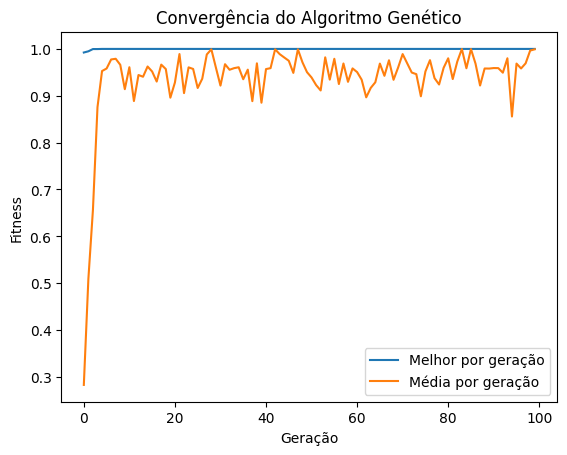

In [41]:
ga = GeneticAlgorithm(
    fitness_fn=fitness_function,
    population_size=50,
    generations=100,
    bits=10,
    tournament_size=3,
    crossover_rate=0.8,
    mutation_rate=0.01,
    x_lower=0.0,
    x_upper=1.0
)
best_x, best_val, best_hist, avg_hist = ga.run()
print(f"Melhor solução: x = {best_x:.3f}, f(x) = {best_val:.5f}")

# Plot de convergência
plt.figure()
plt.plot(best_hist, label='Melhor por geração')
plt.plot(avg_hist, label='Média por geração')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Convergência do Algoritmo Genético')
plt.legend()
plt.show()

Utilize uma representação por bitstring com precisão suficiente para pelo menos três casas decimais.

R: feito, imagem logo acima.

Melhor x encontrado: 0.100
Valor máximo de g(x): 0.99994

Registro dos maiores valores de g(x) por geração:
Geração   1: 0.96862
Geração   2: 0.99484
Geração   3: 0.99795
Geração   4: 0.99965
Geração   5: 0.99965
Geração   6: 0.99965
Geração   7: 0.99965
Geração   8: 0.99994
Geração   9: 0.99994
Geração  10: 0.99994
Geração  11: 0.99994
Geração  12: 0.99994
Geração  13: 0.99994
Geração  14: 0.99994
Geração  15: 0.99994
Geração  16: 0.99994
Geração  17: 0.99994
Geração  18: 0.99994
Geração  19: 0.99994
Geração  20: 0.99994
Geração  21: 0.99994
Geração  22: 0.99994
Geração  23: 0.99994
Geração  24: 0.99994
Geração  25: 0.99994
Geração  26: 0.99994
Geração  27: 0.99994
Geração  28: 0.99994
Geração  29: 0.99994
Geração  30: 0.99994


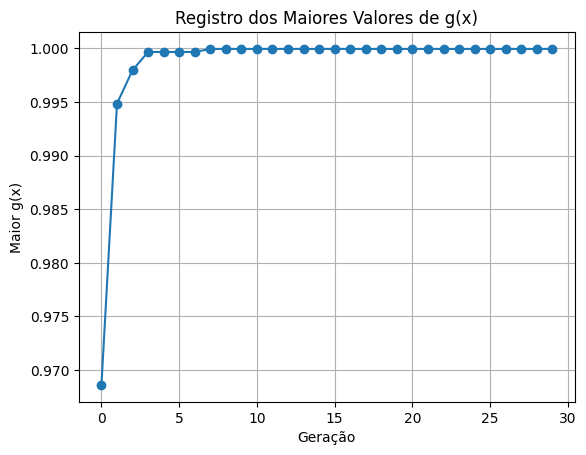

In [44]:
# Função alvo desconhecida g(x) (caixa-preta)
def g(x):
    """
    Caixa-preta: g(x) retorna o valor a ser maximizado
    """
    # implementação interna (desconhecida ao GA)
    return 2**(-2 * ((x - 0.1) / 0.9)**2) * np.sin(5 * np.pi * x)**6

class GeneticAlgorithm:
    def __init__(self,
                 target_fn,
                 population_size=50,
                 generations=100,
                 bits=10,
                 tournament_size=3,
                 crossover_rate=0.8,
                 mutation_rate=0.01,
                 x_lower=0.0,
                 x_upper=1.0):
        self.target_fn = target_fn     # caixa-preta
        self.population_size = population_size
        self.generations = generations
        self.bits = bits
        self.max_int = 2**bits - 1
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.x_lower = x_lower
        self.x_upper = x_upper

    def initialize_population(self):
        return np.random.randint(0, self.max_int + 1, self.population_size)

    def decode(self, chromosome):
        return self.x_lower + (self.x_upper - self.x_lower) * chromosome / self.max_int

    def evaluate(self, population):
        xs = self.decode(population)
        return self.target_fn(xs)

    def tournament_selection(self, population, fitnesses):
        selected = []
        for _ in range(self.population_size):
            contenders = np.random.choice(self.population_size, self.tournament_size, replace=False)
            winner = contenders[np.argmax(fitnesses[contenders])]
            selected.append(population[winner])
        return np.array(selected)

    def crossover(self, p1, p2):
        if np.random.rand() < self.crossover_rate:
            pt = np.random.randint(1, self.bits)
            mask = (1 << pt) - 1
            c1 = (p1 & mask) | (p2 & ~mask)
            c2 = (p2 & mask) | (p1 & ~mask)
            return c1, c2
        return p1, p2

    def mutate(self, chromosome):
        for b in range(self.bits):
            if np.random.rand() < self.mutation_rate:
                chromosome ^= (1 << b)
        return chromosome

    def run(self):
        population = self.initialize_population()
        best_history = []
        best_solution = None
        best_value = -np.inf

        for gen in range(self.generations):
            fitnesses = self.evaluate(population)
            current_best = np.max(fitnesses)
            best_history.append(current_best)
            idx = np.argmax(fitnesses)
            if fitnesses[idx] > best_value:
                best_value = fitnesses[idx]
                best_solution = population[idx]

            # Evolução
            selected = self.tournament_selection(population, fitnesses)
            np.random.shuffle(selected)
            offspring = []
            for i in range(0, self.population_size, 2):
                c1, c2 = self.crossover(selected[i], selected[(i+1) % self.population_size])
                offspring.append(self.mutate(c1))
                offspring.append(self.mutate(c2))
            population = np.array(offspring)

        best_x = self.decode(best_solution)
        return best_x, best_value, best_history


# Execução e registro de máximos de g(x)
ga = GeneticAlgorithm(
    target_fn=g,
    population_size=50,
    generations=30,
    bits=10,
    tournament_size=3,
    crossover_rate=0.8,
    mutation_rate=0.01
)
best_x, best_val, history = ga.run()
print(f"Melhor x encontrado: {best_x:.3f}")
print(f"Valor máximo de g(x): {best_val:.5f}\n")
print("Registro dos maiores valores de g(x) por geração:")
for i, val in enumerate(history, 1):
    print(f"Geração {i:3d}: {val:.5f}")

# Plot dos máximos de g(x)
plt.figure()
plt.plot(history, marker='o')
plt.xlabel('Geração')
plt.ylabel('Maior g(x)')
plt.title('Registro dos Maiores Valores de g(x)')
plt.grid(True)
plt.show()


Pelos gráficos podemos observar uma convergência muito rápida, nas primeiras 5-6 gerações o GA já sobe de um valor inicial (em torno de 0.925) até aproximadamente 0.995. Isso demonstra que, com uma população pequena (50) e resolução de 10 bits, é possível encontrar rapidamente regiões de alto fitnes.